In [40]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [41]:
industrial_safety_df = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
industrial_safety_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [43]:
industrial_safety_df.shape

(425, 11)

### Grouping by Accident Level and Potential Accident Level 

In [44]:
group_acc_level = industrial_safety_df.groupby(['Accident Level'])
group_acc_level.first()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,,
I,0,01-01-2016 00:00,Country_01,Local_01,Mining,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
II,22,10-02-2016 00:00,Country_01,Local_03,Mining,IV,Male,Third Party,Others,While aligning the right bracket of tower N ° ...
III,16,06-02-2016 00:00,Country_01,Local_04,Mining,IV,Male,Third Party,Others,"At Rp 050 of level 1620, in circumstances wher..."
IV,4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
V,33,20-02-2016 00:00,Country_01,Local_04,Mining,V,Male,Third Party,Others,Approximately 1:40 p.m. in circumstances that ...


In [16]:
group_ptnl_acc_level = industrial_safety_df.groupby(['Potential Accident Level'])
group_ptnl_acc_level.first()

,Date,Countries,Local,Industry Sector,Accident Level,Gender,Employee or Third Party,Critical Risk,Description
Potential Accident Level,,,,,,,,,
I,08-01-2016 00:00,Country_01,Local_04,Mining,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
II,26-01-2016 00:00,Country_01,Local_06,Metals,I,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...
III,06-01-2016 00:00,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
IV,01-01-2016 00:00,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
V,02-02-2016 00:00,Country_01,Local_01,Mining,IV,Male,Third Party,Electrical installation,"In moments that the operator of the Jumbo 2, t..."
VI,25-01-2017 00:00,Country_01,Local_03,Mining,V,Male,Third Party,remains of choco,During the process of loading drills in the Ca...


### Dataset Analysis
- #### Data Cleansing

In [51]:
#Renaming Data -> date, Genre -> Gender
#Removing the Column Unnamed as it's just sequence

industrial_safety_df.rename(columns = {'Data': 'Date', 'Genre': 'Gender'}, inplace = True)
industrial_safety_df = industrial_safety_df.drop("Unnamed: 0",axis=1)
industrial_safety_df.head()


,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [53]:
industrial_safety_df.describe()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,08-02-2017 00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,316,143,403,189,232,3


In [36]:
industrial_safety_df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [30]:
industrial_safety_df.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Gender                      object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

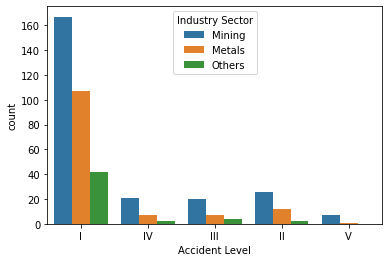

In [47]:
sns.countplot(x ='Accident Level', data = industrial_safety_df, hue ='Industry Sector'); 

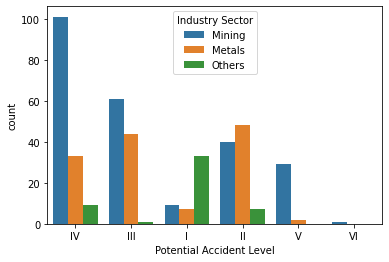

In [54]:
sns.countplot(x ='Potential Accident Level', data = industrial_safety_df, hue ='Industry Sector'); 

#### We can see that the Mining Sector is the most risky as the most number of accidents recorded in that sector followed by Metals

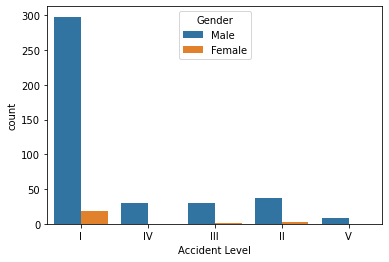

In [55]:
sns.countplot(x ='Accident Level', data = industrial_safety_df, hue ='Gender'); 

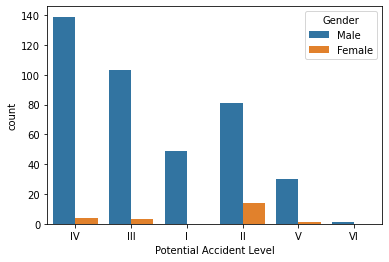

In [56]:
sns.countplot(x ='Potential Accident Level', data = industrial_safety_df, hue ='Gender'); 